<a href="https://colab.research.google.com/github/Aaryaaaaaaa/Aaryaaaaaaa/blob/main/plant_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import random
random.seed(0)
import numpy as np
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(0)


DEPENDENCIES

In [3]:
import os
import json
from zipfile import ZipFile
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models

DATA

In [4]:
!pip install kaggle

In [8]:
kaggle_cred=json.load(open("/content/kaggle.json"))

In [9]:
os.environ['KAGGLE USERNAME']=kaggle_cred['username']
os.environ['KAGGLE KEY']=kaggle_cred['key']

In [10]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
plantvillage-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [11]:
!ls

kaggle.json  plantvillage-dataset.zip  sample_data


In [12]:
#unzipping the file
with ZipFile('plantvillage-dataset.zip','r') as zip_ref:
  zip_ref.extractall()

In [13]:
print(os.listdir("plantvillage dataset"))

print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['segmented', 'color', 'grayscale']
38
['Potato___Early_blight', 'Tomato___Bacterial_spot', 'Tomato___healthy', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)']
38
['Potato___Early_blight', 'Tomato___Bacterial_spot', 'Tomato___healthy', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)']
38
['Potato___Early_blight', 'Tomato___Bacterial_spot', 'Tomato___healthy', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)']


In [14]:
print(len(os.listdir('/content/plantvillage dataset/color/Grape___Black_rot')))
print(os.listdir('/content/plantvillage dataset/color/Grape___Black_rot')[:5])

1180
['ccbc65da-e98d-4478-b7d6-3eb08e0180a3___FAM_B.Rot 0324.JPG', '15970ab4-a9f2-4420-966b-38a0cad8f1dc___FAM_B.Rot 3606.JPG', '7fca570e-59da-4f97-829d-dec4eeb0f341___FAM_B.Rot 3525.JPG', '21530b5c-f5aa-495f-b567-96a1d25b4388___FAM_B.Rot 0380.JPG', '2b6ed613-e216-43ac-b518-ee54873b21e3___FAM_B.Rot 0639.JPG']


PREPROCESSING

In [15]:
base_dir='/content/plantvillage dataset/color'


(256, 256, 3)


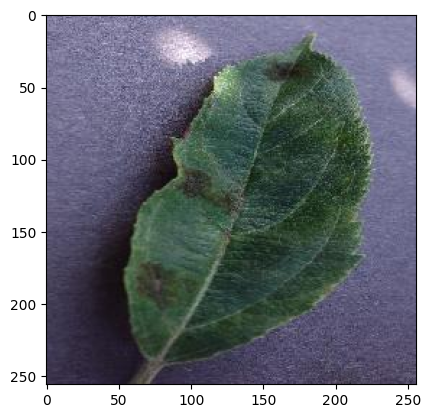

In [16]:
image_path= '/content/plantvillage dataset/color/Apple___Apple_scab/029424b0-0ef5-491b-9ef5-069190d24d8f___FREC_Scab 3504.JPG'
#READING IMAGE
img= mpimg.imread(image_path)
print(img.shape)
plt.imshow(img)
plt.show()

In [17]:
print(img)

[[[105 101 134]
  [142 138 171]
  [136 132 165]
  ...
  [131 130 164]
  [133 132 166]
  [134 133 167]]

 [[128 124 157]
  [130 126 159]
  [131 127 160]
  ...
  [132 131 165]
  [134 133 167]
  [135 134 168]]

 [[127 123 156]
  [125 121 154]
  [131 127 160]
  ...
  [135 134 168]
  [135 134 168]
  [136 135 169]]

 ...

 [[ 64  56  80]
  [ 63  55  79]
  [ 60  52  76]
  ...
  [ 61  55  81]
  [ 93  87 113]
  [ 90  84 110]]

 [[ 60  52  76]
  [ 61  53  77]
  [ 62  54  78]
  ...
  [ 73  67  93]
  [ 73  67  93]
  [ 83  77 103]]

 [[ 56  48  72]
  [ 59  51  75]
  [ 64  56  80]
  ...
  [ 81  75 101]
  [ 80  74 100]
  [ 78  72  98]]]


In [18]:
img_size=224
batch_size=32

In [19]:
data_gen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2 #20% of data for validation
)

TRAINING

In [20]:
train_generator= data_gen.flow_from_directory (
    base_dir,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
 )

Found 43456 images belonging to 38 classes.


In [21]:
validation_generator= data_gen.flow_from_directory (
    base_dir,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
 )

Found 10849 images belonging to 38 classes.


CNN

In [22]:
model=models.Sequential()

model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(img_size,img_size,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(train_generator.num_classes,activation='softmax'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

TRAINING MODEL

In [25]:
history=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples//batch_size
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 113s 78ms/step - accuracy: 0.6033 - loss: 1.8642 - val_accuracy: 0.8372 - val_loss: 0.5163
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.5690
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 107s 78ms/step - accuracy: 0.9201 - loss: 0.2534 - val_accuracy: 0.8638 - val_loss: 0.4450
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 4.4107e-06
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 98s 72ms/step - accuracy: 0.9652 - loss: 0.1092 - val_accuracy: 0.8807 - val_loss: 0.4527


In [26]:
val_loss, val_accuracy=model.evaluate(validation_generator, steps=validation_generator.samples//batch_size)
print(f"validation_accuracy:{val_accuracy * 100: .2f}%")

339/339 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.8851 - loss: 0.4347
validation_accuracy: 88.06%


VISUALISING ACCURACY VALUES

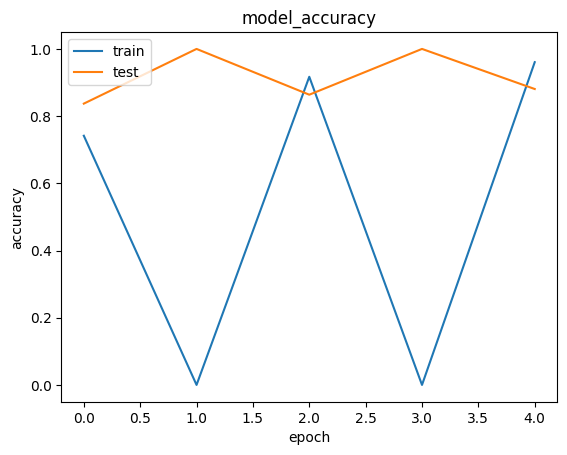

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [30]:
def load_and_preprocess_image(image_path,target_size=[224,224]):
  img=Image.open(image_path)
  img=img.resize(target_size)
  img_array=np.array(img)
  img_array=np.expand_dims(img_array,axis=0)
  img_array=img_array.astype('float32')/255.0
  return img_array


In [42]:
#Function to predict class of image
def predict_image_class(model,image_path,class_indices):
  preprocessed_image=load_and_preprocess_image(image_path)
  prediction=model.predict(preprocessed_image)
  predicted_class_index=np.argmax(prediction, axis=1)[0]
  predicted_class_name= class_indices[predicted_class_index]
  return predicted_class_name

In [43]:
class_indices={v: k for k,v in train_generator.class_indices.items()}


In [44]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [36]:
#Saving class names as JSON file
json.dump(class_indices,open('class_indices.json','w'))

In [47]:
#Example Usage
image_path='/content/plantvillage dataset/color/Cherry_(including_sour)___healthy/0086a8c7-1440-423e-939d-d0567b1fc4e4___JR_HL 4277.JPG'
predicted_class_name=predict_image_class(model,image_path,class_indices)

#Result
print('Predicted Class Name:', predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Class Name: Cherry_(including_sour)___healthy
